# Data Modelling for the Rent Calculator

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# get final database csv version
columns = ['rent', 'bedroom', 'address', 'bathroom', 'parking', 'area', 'suburb', 'street', 'zone']

df = pd.read_csv('https://raw.githubusercontent.com/smalvar/CalculadoraAluguel-Novembro/main/banco_final.csv',
                index_col=[0], names=columns, header=0)

df.reset_index(drop=True, inplace=True)
df.head()

,rent,bedroom,address,bathroom,parking,area,suburb,street,zone
0,3400,2.0,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2.0,1.0,130,Jardim Paulista,"Rua Caconde, 310",Oeste
1,3400,2.0,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2.0,2.0,88,Sumarezinho,"Rua Oscar Caravelas, 280",Oeste
2,5400,2.0,"Rua Peixoto Gomide, 596 - Jardim Paulista, São...",2.0,1.0,72,Jardim Paulista,"Rua Peixoto Gomide, 596",Oeste
3,2600,2.0,"Rua Pamplona - Jardim Paulista, São Paulo - SP",2.0,1.0,91,Jardim Paulista,Rua Pamplona,Oeste
4,3800,1.0,"Pinheiros, São Paulo - SP",1.0,1.0,44,SP,"Pinheiros, São Paulo",Oeste


In [3]:
# set target variable and features list
# target y
y = df.rent

# features list
features = ['bedroom', 'bathroom', 'parking', 'area', 'zone']
X = df[features].reset_index(drop=True)

# convert the zone categories to dummy binary variables
X = pd.get_dummies(X)
X.head()

,bedroom,bathroom,parking,area,zone_Centro,zone_Leste,zone_Norte,zone_Oeste,zone_Sul
0,2.0,2.0,1.0,130,0,0,0,1,0
1,2.0,2.0,2.0,88,0,0,0,1,0
2,2.0,2.0,1.0,72,0,0,0,1,0
3,2.0,2.0,1.0,91,0,0,0,1,0
4,1.0,1.0,1.0,44,0,0,0,1,0


### Model Using KNN

In [13]:
# create the model
rent_model = KNeighborsRegressor(n_neighbors=3)

rent_model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [15]:
# make validation predictions and calculate MAE
rent_model.predict([X.iloc[0]]) # predict first row

array([3540.])

In [16]:
df.iloc[0].rent # actual rent value

3400

In [17]:
# random new value
rent_model.predict([[72, 2, 2, 1, 0, 0, 0, 1, 0]])

array([716.66666667])

Text(0, 0.5, 'Rent')

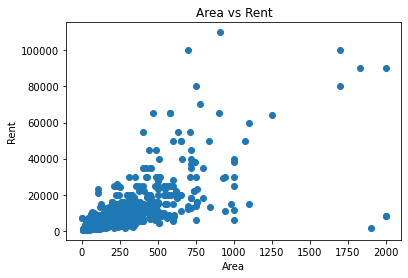

In [19]:
# Plot Scatter Area vs Rent
plt.scatter(df.area, df.rent)
plt.title('Area vs Rent')
plt.xlabel('Area')
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

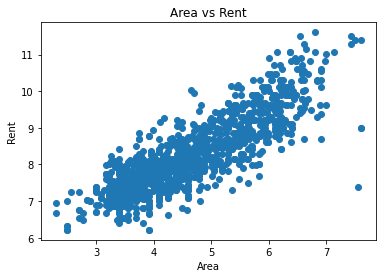

In [22]:
# Plot scatter using log 
plt.scatter(np.log(df.area), np.log(df.rent))
plt.title('Area vs Rent')
plt.xlabel('Area')
plt.ylabel('Rent')

### Using Linear Regression

In [26]:
rent_lr = LinearRegression()
rent_lr.fit(X, y)

LinearRegression()

In [27]:
rent_lr.coef_

array([ -243.97330043,  1297.497614  ,   333.59687688,    25.8795294 ,
         928.93829529, -1539.91785816,  -849.36112437,  1089.13207074,
         371.2086165 ])

In [28]:
rent_lr.intercept_

-1453.0427412549461

$$rent = w_1 * area + w_2 *	bedroom+ w_3 *bathroom + w_4*parking + w_5*	zonacentro+ w_6 *	zonaleste + w_7 *	zonanorte + w_7 *	zonaoeste + w_8*zonasul +  b$$

In [30]:
rent_lr.predict([[72, 2, 2, 1, 0, 0, 0, 1, 0]])

array([-14641.91979028])

### Using DecisionTreeRegressor

In [32]:
rent_dt = DecisionTreeRegressor(max_depth=3, random_state=1)
rent_dt.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [33]:
rent_dt.predict([[72, 2, 2, 1, 0, 0, 0, 1, 0]])

array([2336.64067797])

[Text(558.0, 951.3000000000001, 'area <= 401.5\nmse = 135095184.626\nsamples = 1098\nvalue = 7412.638'),
 Text(279.0, 679.5, 'area <= 170.5\nmse = 20460618.346\nsamples = 946\nvalue = 4431.9'),
 Text(139.5, 407.70000000000005, 'area <= 104.0\nmse = 4761890.853\nsamples = 730\nvalue = 2856.115'),
 Text(69.75, 135.89999999999998, 'mse = 2076080.332\nsamples = 590\nvalue = 2336.641'),
 Text(209.25, 135.89999999999998, 'mse = 10150767.649\nsamples = 140\nvalue = 5045.329'),
 Text(418.5, 407.70000000000005, 'area <= 308.5\nmse = 36762880.666\nsamples = 216\nvalue = 9757.468'),
 Text(348.75, 135.89999999999998, 'mse = 26610547.992\nsamples = 150\nvalue = 8612.633'),
 Text(488.25, 135.89999999999998, 'mse = 50087761.262\nsamples = 66\nvalue = 12359.364'),
 Text(837.0, 679.5, 'area <= 630.5\nmse = 449102128.295\nsamples = 152\nvalue = 25963.816'),
 Text(697.5, 407.70000000000005, 'area <= 405.0\nmse = 171855620.143\nsamples = 95\nvalue = 19508.937'),
 Text(627.75, 135.89999999999998, 'mse = 0.

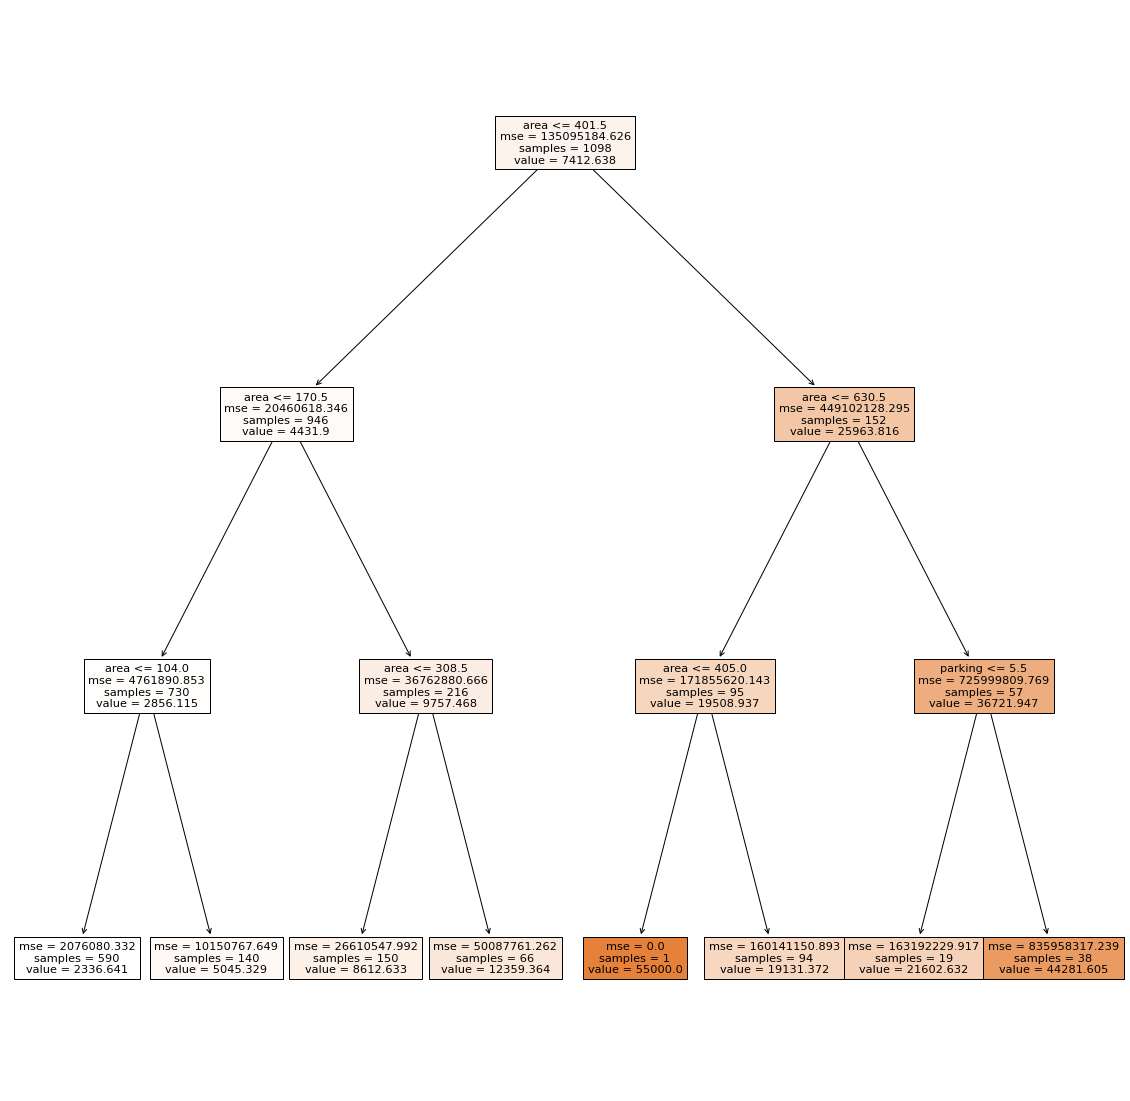

In [37]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(rent_dt, filled=True, feature_names=X.columns)

In [38]:
# filter dataset for properties up to 200 m2
max_area = 200
area_filter = df.area <= max_area

In [42]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X[area_filter], y[area_filter])

DecisionTreeRegressor(max_depth=3)

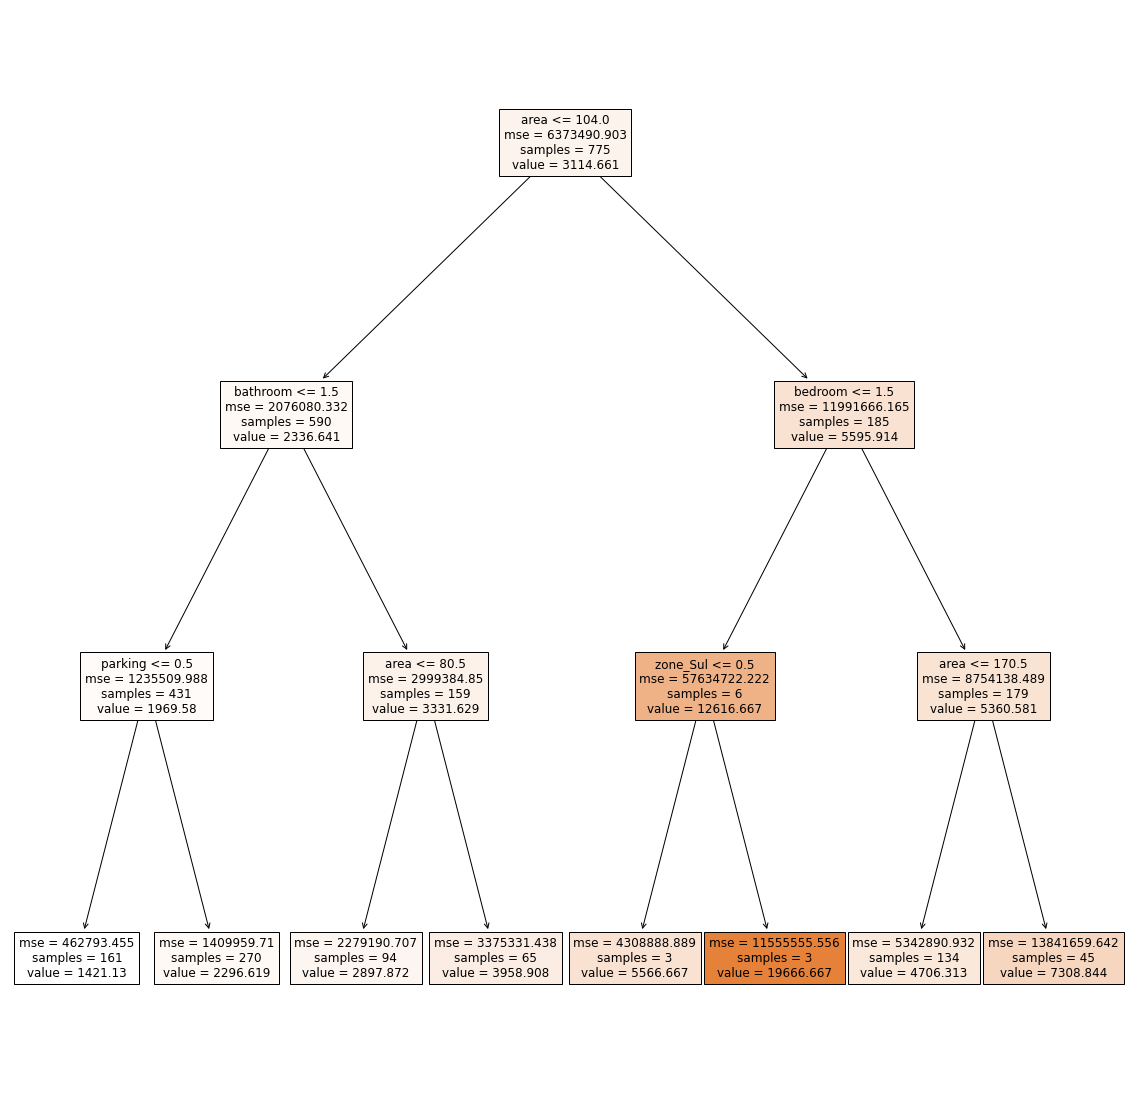

In [43]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True, feature_names=X.columns);

Text(0, 0.5, 'Rent')

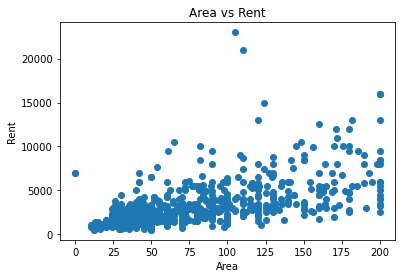

In [48]:
# Plot Scatter Area <= 200 vs Rent
plt.scatter(X[area_filter].area, y[area_filter])
plt.title('Area vs Rent')
plt.xlabel('Area')
plt.ylabel('Rent')